# Comparacion de Modelos de Clasificacion en Python

### Importamos Librerias 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

### Importamos nuestros datos desde el Object Store

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7541d83256d84bc897d2a76e9f893ea1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VmofPTWwPjLN6Rf3TG6MFIOft9ZfDjLFOLLjZwvgzPtU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7541d83256d84bc897d2a76e9f893ea1.get_object(Bucket='myjupyternotebookonibmdatascience-donotdelete-pr-5vjmjo6telbdft',Key='titanic_df_ready_for_modeling.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_meanimp,Age_medianimp,Title,Surname,Age_scal,Fare_scaled,Family_size,IsAlone
0,0.0,NaN,0,0.0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,0,22.0,22.0,0,Braund,-0.581628,-0.503291,2,0
1,1.0,C85,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,1,38.0,38.0,1,Cumings,0.658652,0.734744,2,0
2,2.0,NaN,0,2.0,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,2,26.0,26.0,1,Heikkinen,-0.271558,-0.490240,1,1
3,3.0,C123,0,3.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,3,35.0,35.0,1,Futrelle,0.426099,0.383183,2,0
4,3.0,NaN,0,2.0,"Allen, Mr. William Henry",0,5,3,1,0,0.0,4,35.0,35.0,0,Allen,0.426099,-0.487824,1,1


### Etapa de Modelado

En en este video pretendemos enfocarnos en mostrarles una de las tantas formas de comparar distintos modelos de clasificacion en base a algunas de las metricas mas utilizadas para determinar que tan bueno nuestro modelo es.

In [4]:
#Tomamos algunas de las columnas del dataset
X = df[['Pclass','Sex','Title','Fare_scaled']].loc[:890]
y = df['Survived'].loc[:890]

#Con la funcion que nos facilita SKlearn hacemos la separacion de datos para entrenar y testiar
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2)

Armamos una funcion para extraer las metricas de la funcion de SKlearn `Classification_Report`

In [14]:
def get_mets(x):
    metrics = []
    report = x.split(' ')
    for i in range(len(report)-1):
        if len(report[i]) > 3:
            metrics.append(report[i])
    return metrics

### KNN Classifier

In [38]:
knn_params = {'leaf_size':[1,5,10,15,20,25,30] ,'n_neighbors':[5,6,7,8,9,10,11], 'p':[1,2], 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV (knn, knn_params, scoring='roc_auc', cv=5)
grid_knn.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_knn.best_score_, 
                                                                                 grid_knn.best_params_))

La AUC mas alta conseguida es 0.8699764986886713 con los siguientes parametros {'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


Despues de hacer el grid search para obtener los parametros que nos ayudaran a entrenar el mejor KNN, pasamos a entrenar un modelo y ver su comportamiento en nuestra data conocida,

In [12]:
knn_ = KNeighborsClassifier(n_neighbors= 10, leaf_size= 10, p=1, weights='distance')
knn_.fit(trainX,trainy)
knn_y_pred = knn_.predict(testX)

class_rep_knn = classification_report(testy, knn_y_pred)
print(class_rep_knn)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       103
         1.0       0.91      0.79      0.85        76

   micro avg       0.88      0.88      0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



 Extraigo del reporte las distintas metricas en variables para luego utilizarlas

In [22]:
knn_metrics = get_mets(class_rep_knn)

knn_precision = knn_metrics[8]
knn_recall = knn_metrics[9]
knn_f1 = round(f1_score(testy, knn_y_pred),2)
knn_acc = round(accuracy_score(testy, knn_y_pred),2)

print('La precision del modelo es {}'.format(knn_precision,))
print('El recall del modelo es {}'.format(knn_recall))
print('El F1 score del modelo es {}'.format(knn_f1))
print('El acierto del modelo es {}'.format(knn_acc))

La precision del modelo es 0.91
El recall del modelo es 0.79
El F1 score del modelo es 0.85
El acierto del modelo es 0.88


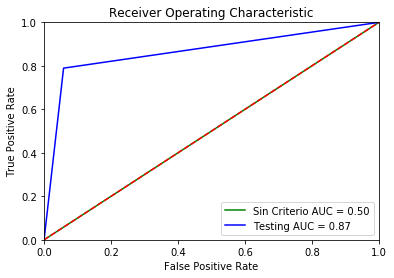

In [87]:
#Prediccion sin criterio alguno
ns_pred = [0 for _ in range(len(testy))]
fpr_ns, tpr_ns, threshold = roc_curve(testy, ns_pred)
roc_auc_ns = auc(fpr_ns, tpr_ns)

#test data ROC
fpr_ts_knn, tpr_ts_knn, threshold_knn = roc_curve(testy, knn_y_pred)
roc_auc_test_knn = auc(fpr_ts_knn, tpr_ts_knn)

#Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_ns, tpr_ns, 'g', label = 'Sin Criterio AUC = %0.2f' % roc_auc_ns)
plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [37]:
lr = LogisticRegression()
lr_params = {'solver':['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],'C': [0.01,0.1,1,10,15], 'penalty' : ['l2']}
grid_lr = GridSearchCV(lr, lr_params, cv=5, error_score=0.)
grid_lr.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_lr.best_score_, 
                                                                                 grid_lr.best_params_))

La AUC mas alta conseguida es 0.7833894500561167 con los siguientes parametros {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [32]:
lr_ = LogisticRegression(C= 0.1, penalty='l2', solver='liblinear')
lr_.fit(trainX,trainy)
lr_y_pred = lr_.predict(testX)

class_rep_lr = classification_report(testy, lr_y_pred)

In [35]:
lr_metrics = get_mets(class_rep_lr)

lr_precision = lr_metrics[8]
lr_recall = lr_metrics[9]
lr_f1 = round(f1_score(testy, lr_y_pred),2)
lr_acc = round(accuracy_score(testy, lr_y_pred),2)

#test data ROC
fpr_ts_lr, tpr_ts_lr, threshold_lr = roc_curve(testy, lr_y_pred)
roc_auc_test_lr = auc(fpr_ts_lr, tpr_ts_lr)

### Decision Tree Classifier

In [41]:
d_tree = DecisionTreeClassifier(splitter='random')
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth':[None,1,3,5,6,7]}
grid_tree = GridSearchCV(d_tree, tree_params, cv=5, error_score=0.)
grid_tree.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_tree.best_score_, 
                                                                                 grid_tree.best_params_))

La AUC mas alta conseguida es 0.8395061728395061 con los siguientes parametros {'criterion': 'gini', 'max_depth': None}


In [42]:
tree_ = DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='random')
tree_.fit(trainX,trainy)
tree_y_pred = tree_.predict(testX)

class_rep_tree = classification_report(testy, tree_y_pred)

In [43]:
tree_metrics = get_mets(class_rep_tree)

tree_precision = tree_metrics[8]
tree_recall = tree_metrics[9]
tree_f1 = round(f1_score(testy, tree_y_pred),2)
tree_acc = round(accuracy_score(testy, tree_y_pred),2)

#test data ROC
fpr_ts_tree, tpr_ts_tree, threshold_tree = roc_curve(testy, tree_y_pred)
roc_auc_test_tree = auc(fpr_ts_tree, tpr_ts_tree)

### Random Forest Classifier

In [45]:
forest = RandomForestClassifier()
forest_params = {'n_estimators':[100,300, 400, 50], 'max_depth':[None, 10, 9,8], 'max_features':[2,3,'log2',None]}
grid_forest = GridSearchCV(forest, forest_params, cv=5,error_score=0.)
grid_forest.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_forest.best_score_, 
                                                                                 grid_forest.best_params_))

La AUC mas alta conseguida es 0.8417508417508418 con los siguientes parametros {'max_depth': 9, 'max_features': 3, 'n_estimators': 300}


In [46]:
forest_ = RandomForestClassifier(max_depth=9, n_estimators=300, max_features=3, min_samples_split=3, oob_score=True)
forest_.fit(trainX,trainy)
forest_y_pred = forest_.predict(testX)

class_rep_forest = classification_report(testy, forest_y_pred)

In [47]:
forest_metrics = get_mets(class_rep_forest)

forest_precision = forest_metrics[8]
forest_recall = forest_metrics[9]
forest_f1 = round(f1_score(testy, forest_y_pred),2)
forest_acc = round(accuracy_score(testy, forest_y_pred),2)

#test data ROC
fpr_ts_forest, tpr_ts_forest, threshold_forest = roc_curve(testy, forest_y_pred)
roc_auc_test_forest = auc(fpr_ts_forest, tpr_ts_forest)

### Naive Bayes Classifier

In [49]:
nb = GaussianNB()
nb_params = {'var_smoothing':[1e-7,5e-6,1e-6,3e-7,5e-8]}
grid_nb = GridSearchCV(nb, nb_params, cv=5,error_score=0.)
grid_nb.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_nb.best_score_, 
                                                                                 grid_nb.best_params_))

La AUC mas alta conseguida es 0.7699214365881033 con los siguientes parametros {'var_smoothing': 1e-07}


In [50]:
nb_ = GaussianNB(var_smoothing = 1e-7)
nb_.fit(trainX,trainy)
nb_y_pred = nb_.predict(testX)

class_rep_nb = classification_report(testy, nb_y_pred)

In [51]:
nb_metrics = get_mets(class_rep_nb)

nb_precision = nb_metrics[8]
nb_recall = nb_metrics[9]
nb_f1 = round(f1_score(testy, nb_y_pred),2)
nb_acc = round(accuracy_score(testy, nb_y_pred),2)

#test data ROC
fpr_ts_nb, tpr_ts_nb, threshold_nb = roc_curve(testy, nb_y_pred)
roc_auc_test_nb = auc(fpr_ts_nb, tpr_ts_nb)

### Suppor Vector Classifier

In [52]:
svc= SVC()
svc_params = {'C': [11,12,13,14,10], 'kernel':['poly', 'rbf'], 'gamma': ['scale','auto', 0.5, 1.0]}
grid_svc = GridSearchCV(svc, svc_params, cv=5,error_score=0.)
grid_svc.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_svc.best_score_, 
                                                                                 grid_svc.best_params_))

La AUC mas alta conseguida es 0.835016835016835 con los siguientes parametros {'C': 11, 'gamma': 0.5, 'kernel': 'rbf'}


In [54]:
svc_ = SVC(C=11, kernel= 'poly', degree=3, gamma='auto')
svc_.fit(trainX,trainy)
svc_y_pred = svc_.predict(testX)

class_rep_svc = classification_report(testy, svc_y_pred)

In [55]:
svc_metrics = get_mets(class_rep_svc)

svc_precision = svc_metrics[8]
svc_recall = svc_metrics[9]
svc_f1 = round(f1_score(testy, svc_y_pred),2)
svc_acc = round(accuracy_score(testy, svc_y_pred),2)

#test data ROC
fpr_ts_svc, tpr_ts_svc, threshold_svc = roc_curve(testy, svc_y_pred)
roc_auc_test_svc = auc(fpr_ts_svc, tpr_ts_svc)

### Extra Tree

In [57]:
extree=ExtraTreesClassifier(criterion='entropy')
extree_params = {'n_estimators':[10,20,60,100], 'class_weight':[None, 'balanced'], 'bootstrap':[False, True]}
grid_extree = GridSearchCV(extree, extree_params, cv=5,error_score=0.)
grid_extree.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_extree.best_score_, 
                                                                                 grid_extree.best_params_))

La AUC mas alta conseguida es 0.8383838383838383 con los siguientes parametros {'bootstrap': True, 'class_weight': None, 'n_estimators': 60}


In [60]:
extree_ = ExtraTreesClassifier(criterion='entropy', class_weight=None, n_estimators=60, bootstrap=True)
extree_.fit(trainX,trainy)
extree_y_pred = extree_.predict(testX)

class_rep_extree = classification_report(testy, extree_y_pred)

In [61]:
extree_metrics = get_mets(class_rep_extree)

extree_precision = extree_metrics[8]
extree_recall = extree_metrics[9]
extree_f1 = round(f1_score(testy, extree_y_pred),2)
extree_acc = round(accuracy_score(testy, extree_y_pred),2)

#test data ROC
fpr_ts_extree, tpr_ts_extree, threshold_extree = roc_curve(testy, extree_y_pred)
roc_auc_test_extree = auc(fpr_ts_extree, tpr_ts_extree)

### AdaBoostClassifier

In [62]:
ada = AdaBoostClassifier()
ada_params = {'n_estimators':[500,70,60,100], 'base_estimator':[None, tree_]}
grid_ada = GridSearchCV(ada, ada_params, cv=5,error_score=0.)
grid_ada.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_ada.best_score_, 
                                                                                 grid_ada.best_params_))

La AUC mas alta conseguida es 0.8395061728395061 con los siguientes parametros {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'), 'n_estimators': 60}


In [63]:
ada_ = AdaBoostClassifier(base_estimator= tree_, n_estimators=60)
ada_.fit(trainX,trainy)
ada_y_pred = ada_.predict(testX)

class_rep_ada = classification_report(testy, ada_y_pred)

In [64]:
ada_metrics = get_mets(class_rep_ada)

ada_precision = ada_metrics[8]
ada_recall = ada_metrics[9]
ada_f1 = round(f1_score(testy, ada_y_pred),2)
ada_acc = round(accuracy_score(testy, ada_y_pred),2)

#test data ROC
fpr_ts_ada, tpr_ts_ada, threshold_ada = roc_curve(testy, ada_y_pred)
roc_auc_test_ada = auc(fpr_ts_ada, tpr_ts_ada)

### XGboost

In [74]:
xgb = XGBClassifier(eval_metric='error', iid=False)
xgb_params = {'booster':['gbtree', 'gblinear','dart'], 'max_depth':[1,3,5,7,10], 'scale_pos_weight':[0.1,1,3,5]}
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5,error_score=0.)
grid_xgb.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_xgb.best_score_, 
                                                                                 grid_xgb.best_params_))

La AUC mas alta conseguida es 0.8417508417508418 con los siguientes parametros {'booster': 'gbtree', 'max_depth': 7, 'scale_pos_weight': 1}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
xgb_ = XGBClassifier(booster='gbtree', eval_metric='error', max_depth=7, scale_pos_weight=1, eta=0.3, gamma=1, subsample=0.75)
xgb_.fit(trainX,trainy)
xgb_y_pred = xgb_.predict(testX)

class_rep_xgb = classification_report(testy, xgb_y_pred)

In [77]:
xgb_metrics = get_mets(class_rep_xgb)

xgb_precision = xgb_metrics[8]
xgb_recall = xgb_metrics[9]
xgb_f1 = round(f1_score(testy, xgb_y_pred),2)
xgb_acc = round(accuracy_score(testy, xgb_y_pred),2)

#test data ROC
fpr_ts_xgb, tpr_ts_xgb, threshold_xgb = roc_curve(testy, xgb_y_pred)
roc_auc_test_xgb = auc(fpr_ts_xgb, tpr_ts_xgb)

### Comparacion

In [88]:
pd.DataFrame({'Models':['K-NN Classifier', 
                        'Logistic Regression', 
                        'Decision Tree Classifier', 
                        'Random Forest Classifier', 
                        'Naive Bayes Classifier', 
                        'SVM Classifier',
                        'Extra Tree Classifier',
                        'AdaBootsrap Classifier',
                        'XGBoosting Classifier'],
             'Accuracy Score': [knn_acc, 
                               lr_acc, 
                               tree_acc, 
                               forest_acc, 
                               nb_acc, 
                               svc_acc,
                               extree_acc, 
                               ada_acc, 
                               xgb_acc], 
             'F1 Score':[knn_f1, 
                        lr_f1, 
                        tree_f1, 
                        forest_f1, 
                        nb_f1, 
                        svc_f1, 
                        extree_f1, 
                        ada_f1, 
                        xgb_f1], 
              'Recall':[knn_recall, 
                        lr_recall, 
                        tree_recall, 
                        forest_recall, 
                        nb_recall, 
                        svc_recall, 
                        extree_recall, 
                        ada_recall, 
                        xgb_recall], 
              'Precision':[knn_precision, 
                        lr_precision, 
                        tree_precision, 
                        forest_precision, 
                        nb_precision, 
                        svc_precision, 
                        extree_precision, 
                        ada_precision, 
                        xgb_precision], 
              'ROC AUC':[roc_auc_test_knn, 
                        roc_auc_test_lr, 
                        roc_auc_test_tree, 
                        roc_auc_test_forest, 
                        roc_auc_test_nb, 
                        roc_auc_test_svc,  
                        roc_auc_test_extree, 
                        roc_auc_test_ada, 
                        roc_auc_test_xgb]})

,Models,Accuracy Score,F1 Score,Recall,Precision,ROC AUC
0,K-NN Classifier,0.88,0.85,0.79,0.91,0.865611
1,Logistic Regression,0.81,0.77,0.76,0.78,0.803909
2,Decision Tree Classifier,0.88,0.85,0.80,0.91,0.872190
3,Random Forest Classifier,0.88,0.86,0.83,0.89,0.875639
4,Naive Bayes Classifier,0.80,0.77,0.76,0.77,0.799055
5,SVM Classifier,0.83,0.78,0.72,0.85,0.813298
6,Extra Tree Classifier,0.86,0.83,0.80,0.86,0.852772
7,AdaBootsrap Classifier,0.87,0.83,0.78,0.89,0.854177
8,XGBoosting Classifier,0.88,0.86,0.83,0.89,0.875639


In [90]:
df_roc = pd.DataFrame({'Models':['K-NN Classifier', 
                        'Logistic Regression', 
                        'Decision Tree Classifier', 
                        'Random Forest Classifier', 
                        'Naive Bayes Classifier', 
                        'SVM Classifier',
                        'Extra Tree Classifier',
                        'AdaBootsrap Classifier',
                        'XGBoosting Classifier'],
             'false_positive_rate':[fpr_ts_knn, 
                                    fpr_ts_lr, 
                                    fpr_ts_tree, 
                                    fpr_ts_forest, 
                                    fpr_ts_nb, 
                                    fpr_ts_svc, 
                                    fpr_ts_extree, 
                                    fpr_ts_ada, 
                                    fpr_ts_xgb],
              'true_positive_rate':[tpr_ts_knn, 
                                    tpr_ts_lr, 
                                    tpr_ts_tree, 
                                    tpr_ts_forest, 
                                    tpr_ts_nb, 
                                    tpr_ts_svc, 
                                    tpr_ts_extree, 
                                    tpr_ts_ada, 
                                    tpr_ts_xgb],
              'ROC_AUC':[roc_auc_test_knn, 
                         roc_auc_test_lr, 
                         roc_auc_test_tree, 
                         roc_auc_test_forest, 
                         roc_auc_test_nb, 
                         roc_auc_test_svc, 
                         roc_auc_test_extree, 
                         roc_auc_test_ada, 
                         roc_auc_test_xgb]})

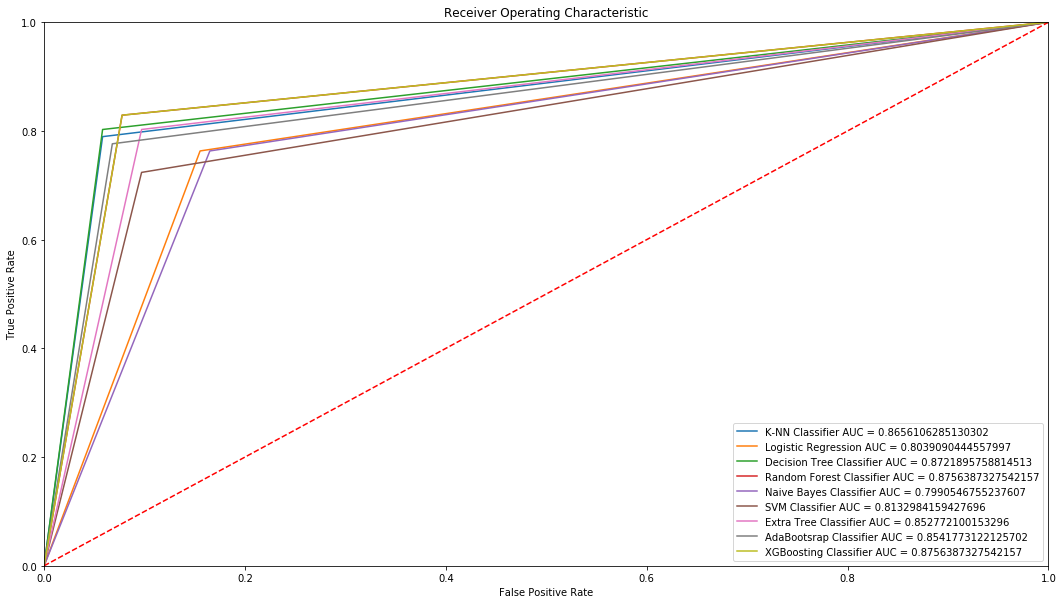

In [95]:
#Plot ROC curve
fig = plt.figure(figsize=(18,10))
plt.title('Receiver Operating Characteristic')
for i in range(df_roc.shape[0]):
    plt.plot(df_roc['false_positive_rate'][i], df_roc['true_positive_rate'][i], label = '{} AUC = {}'.format(df_roc['Models'][i],df_roc['ROC_AUC'][i]))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones

En base al analisis realizado podemos concluir que los modelos que nos pueden dar mejores resultados son `XGBoosting Classifier` y `Random Forest Classifier` 